In [1]:
print("Hello Dataset")

Hello Dataset


In [2]:
from urllib import request
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import zlib

def download_dataset(url, location_):
    request.urlretrieve(url, location_)
    
def load_data(file_path):
    return pd.read_csv(file_path)

def split_data(complete_data, test_split_percent):
    np.random.seed(30)
    shuffled_indices = np.random.permutation(len(complete_data))
    test_count = int(len(complete_data) * test_split_percent)
    test_data_positions = shuffled_indices[:test_count]
    training_data_positions = shuffled_indices[test_count:]
    return complete_data.iloc[training_data_positions], complete_data.iloc[test_data_positions]

def get_test_filter_condition(id_, test_percent):
    return zlib.crc32(np.int64(id_)) & 0xffffffff < test_percent * 2**32

def split_data2(complete_data, test_split_percent, id_col_name):
    data_col = complete_data[id_col_name]
    test_data = data_col.apply(lambda cell: get_test_filter_condition(cell, test_split_percent))
    return complete_data.loc[~test_data], complete_data.loc[test_data]

In [3]:
#file processing
location = os.path.join("dataset", "housing")
principal_url = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.csv'
os.makedirs(location, exist_ok = True)
complete_file_loc = location + ".csv"
download_dataset(principal_url, complete_file_loc)
pd_csv = load_data(complete_file_loc)

In [4]:
housing = pd_csv
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Matplotlib is building the font cache; this may take a moment.


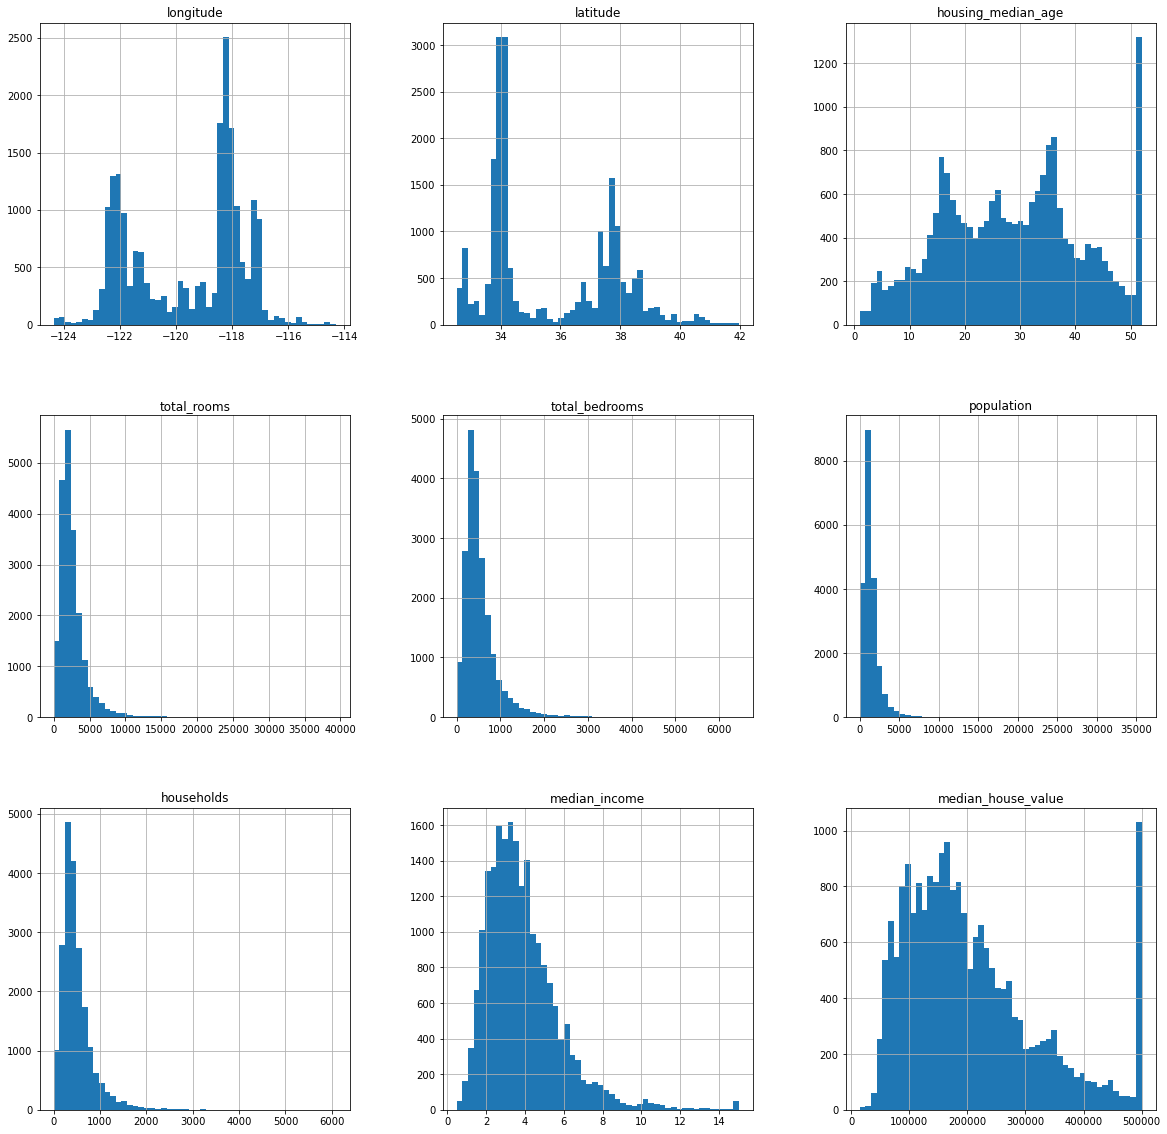

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 20))
plt.show()

In [9]:
train, test = split_data(housing, 0.3)

In [10]:
train_set, test_set = train_test_split(housing, test_size = 0.3, random_state = 33)

In [11]:
#using strata
#dont have too many strata and each stratum should be large enough
#since median income( told by scientist) is a very important factor for the prediction of housing price
#we use strata to determine the sample of the data

In [12]:
housing["median_income"].head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2, 3,4,5])

<AxesSubplot:>

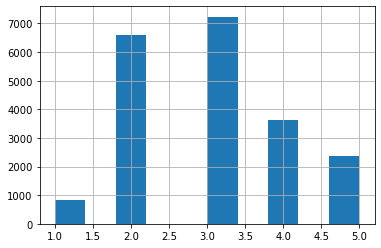

In [14]:
housing["income_cat"].hist()

In [15]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [16]:
#then, we can split based on stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [17]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [18]:
#visualize data
#create a copy of the training data
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

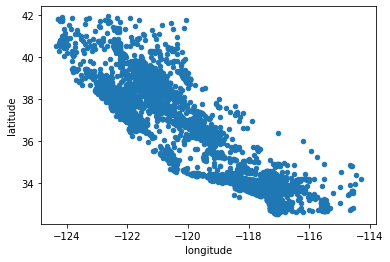

In [19]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

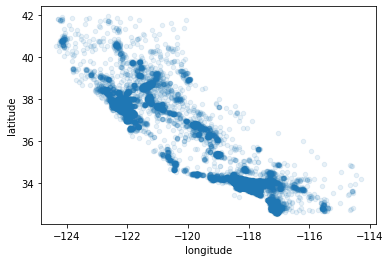

In [20]:
#visualize places with concentrated data point (high density)
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

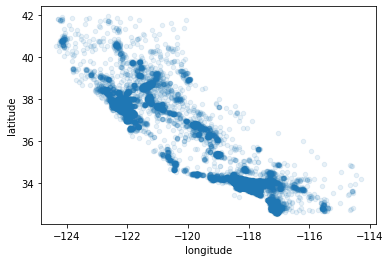

In [21]:
#visualize places with concentrated data point (high density)
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

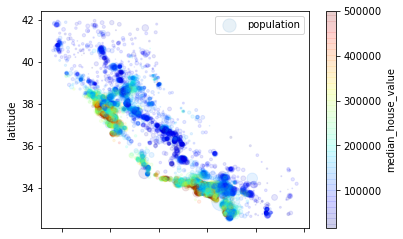

In [22]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1, 
            s = housing["population"]/100, label = "population", c = "median_house_value",
            cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [23]:
#correlation
housing_cor = housing.corr()
housing_cor["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

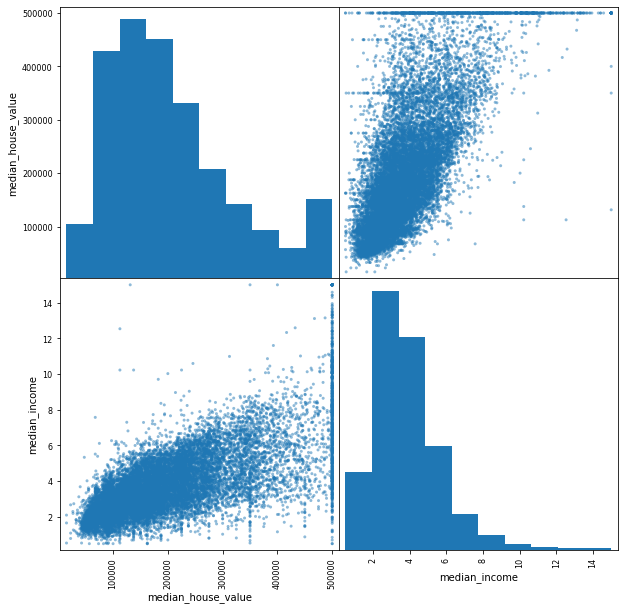

In [24]:
from pandas.plotting import scatter_matrix
attr = ["median_house_value", "median_income"]
scatter_matrix(housing[attr], figsize = (10, 10))

In [25]:
#preparing the data
housing = strat_train_set.drop("median_house_value", axis = 1)
housing = housing.copy()

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


In [27]:
#cleaning data
#dropna - drop the rows/datapoin with na
#drop - drop column/attr/features with na
#fillna - fill na with central of location, mean, median, mode
housing["total_bedrooms"].isnull().values.any()

True

In [28]:
#in a graceful way tho, we can use sckit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_without_category_d = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_without_category_d)
#the fit will enable the imputer to compute the median and store the result in statistics_ instanse var
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [29]:
housing_without_category_d.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
#we transform the completely filled data 
X = imputer.transform(housing_without_category_d)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [31]:
#into panda dataframe
housing_tr = pd.DataFrame(X, columns = housing_without_category_d.columns, index = housing_without_category_d.index)

In [32]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


In [33]:
#dealing with categorical data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


In [34]:
housing_categorical = housing[["ocean_proximity"]]

In [35]:
housing_categorical.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_housing_cat = ordinal_encoder.fit_transform(housing_categorical)
encoded_housing_cat[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_housing_cat = ordinal_encoder.fit_transform(housing_categorical)
encoded_housing_cat[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [38]:
#one hot encoder e.g for (<1H OCEAN) with cols <1H OCEAN, INLAND, ... it will be 
#                                                 1     , 0     , 0,0
from sklearn.preprocessing import OneHotEncoder
ordinal_encoder = OneHotEncoder()
encoded_housing_cat = ordinal_encoder.fit_transform(housing_categorical)
encoded_housing_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
num_encoded_housing_cat = encoded_housing_cat.toarray()
num_encoded_housing_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]